# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> The No-show appointment dataset from kaggle contain information from 10k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. According to the description given by Kaggle about the dataset, there are 110527 medical appointments and 14 associated variables(characteristics). The data dictionary describe the variables and its values as:

- **PatientId**: Identification of a patient.

- **AppointmentID**: Identification of each appointment.

- **Gender**: Male or Female

- **ScheduledDay**: The day someone called or registered the appointment, this is before appointment of course.

- **AppointmentDay**: The day of the actual appointment, when they have to visit the doctor.

- **Age**: How old is the patient.

- **Neighbourhood**: Where the appointment takes place.

- **Scholarship**: True or False.

- **Hipertension**: True or False.

- **Diabetes**: True or False.

- **Alcoholism**: True or False.

- **Handcap**: True or False.

- **SMS_received**: 1 or more messages sent to the patient.

- **No-show**: True or False.

Note: 1 = True and 0 = False


### Question(s) for Analysis


> - **Does the sms will affect in attendance ?**
> - **Does the age will affect in attendance ?**
> - **Does the Gender will affect in attendance ?**
> - **Does the Neighbourhood will affect in attendance ?**
> - **Does the Scholarship will affect in attendance ?**
> - **What is  the affection of other items in attendance ?**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

In [6]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.shape

(110527, 14)

>- The dataset contains 110527 rows and 14 columns 

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>- Age column contains unlogic value(-1) 'neglect in our analysis'   
>- Age column contains outliers (115) 'neglect in our analysis'


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>- There is no null data cells
>- There is no duplicated cells
>- There is no Missing Value cells

## Data Cleaning

In [10]:
df['PatientId'] = df['PatientId'].astype('int')

In [13]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int32         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  object        
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](1), int32(1), int6

In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,-2147483648,5642903,F,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-2147483648,5642503,M,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,-2147483648,5642549,F,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,-2147483648,5642828,F,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,-2147483648,5642494,F,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>- convert Patient ID to Integer
>- AppointmentDay time to be dropped "contains zeros"

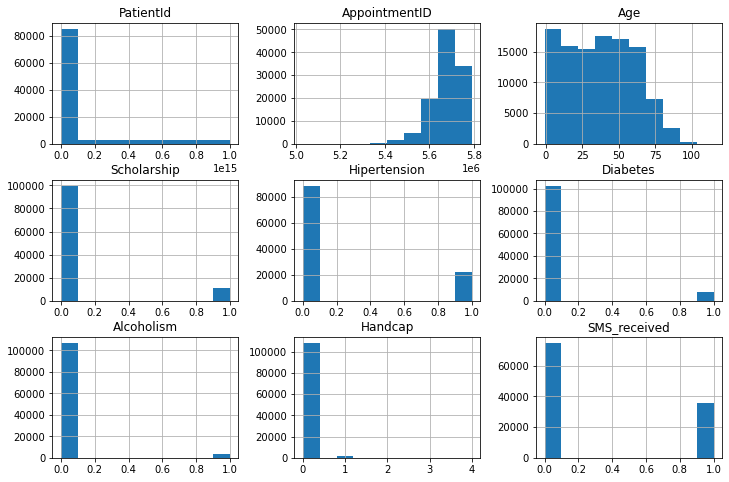

In [38]:
df.hist(figsize=(12,8));

>- histograms shows that Hipertension had the most no show value


In [39]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

## Exploratory Data Analysis

###   Show and no Show Counts  

In [40]:
show = df['No-show'] == 'No'
no_show = df['No-show'] == 'Yes'
show.value_counts()
no_show.value_counts()

False    88208
True     22319
Name: No-show, dtype: int64

In [41]:
def myCountPlot(df,xVar):
    plt.figure(figsize=[14,6])
    df[xVar][show].hist(alpha=0.75, label='show')
    df[xVar][no_show].hist(alpha=0.75, label='no show')
    plt.xlabel(xVar.title())
    plt.title(f'count of show/no show by {xVar}'.title(), fontsize = 14, weight = 'bold')
    plt.legend();

### Does the SMS will affect in attendance ?

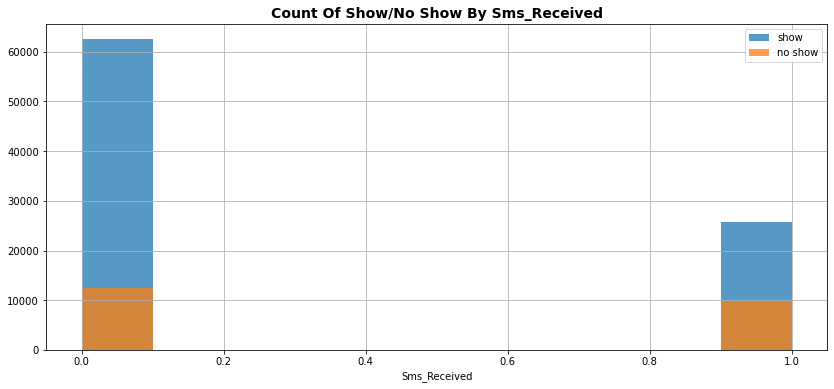

In [42]:
myCountPlot(df, 'SMS_received')

- SMS is not A good indication Parameter as shown.

In [43]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

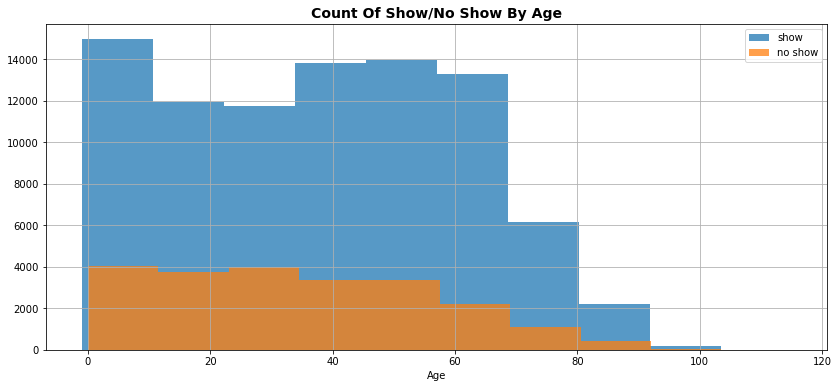

In [44]:
myCountPlot(df, 'Age')

- Mid age people had the most attendance as shown.

### Does the Gender will affect in attendance ?

In [45]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

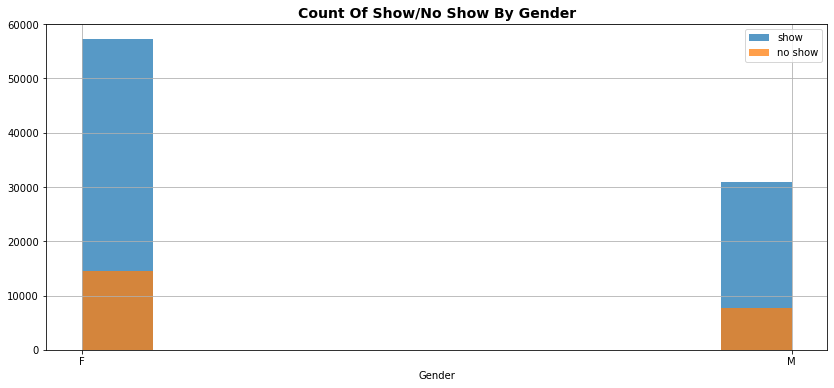

In [46]:
myCountPlot(df, 'Gender')

- Females had the most attendance as shown.

### Does the Neighbourhood will affect in attendance ?


In [47]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

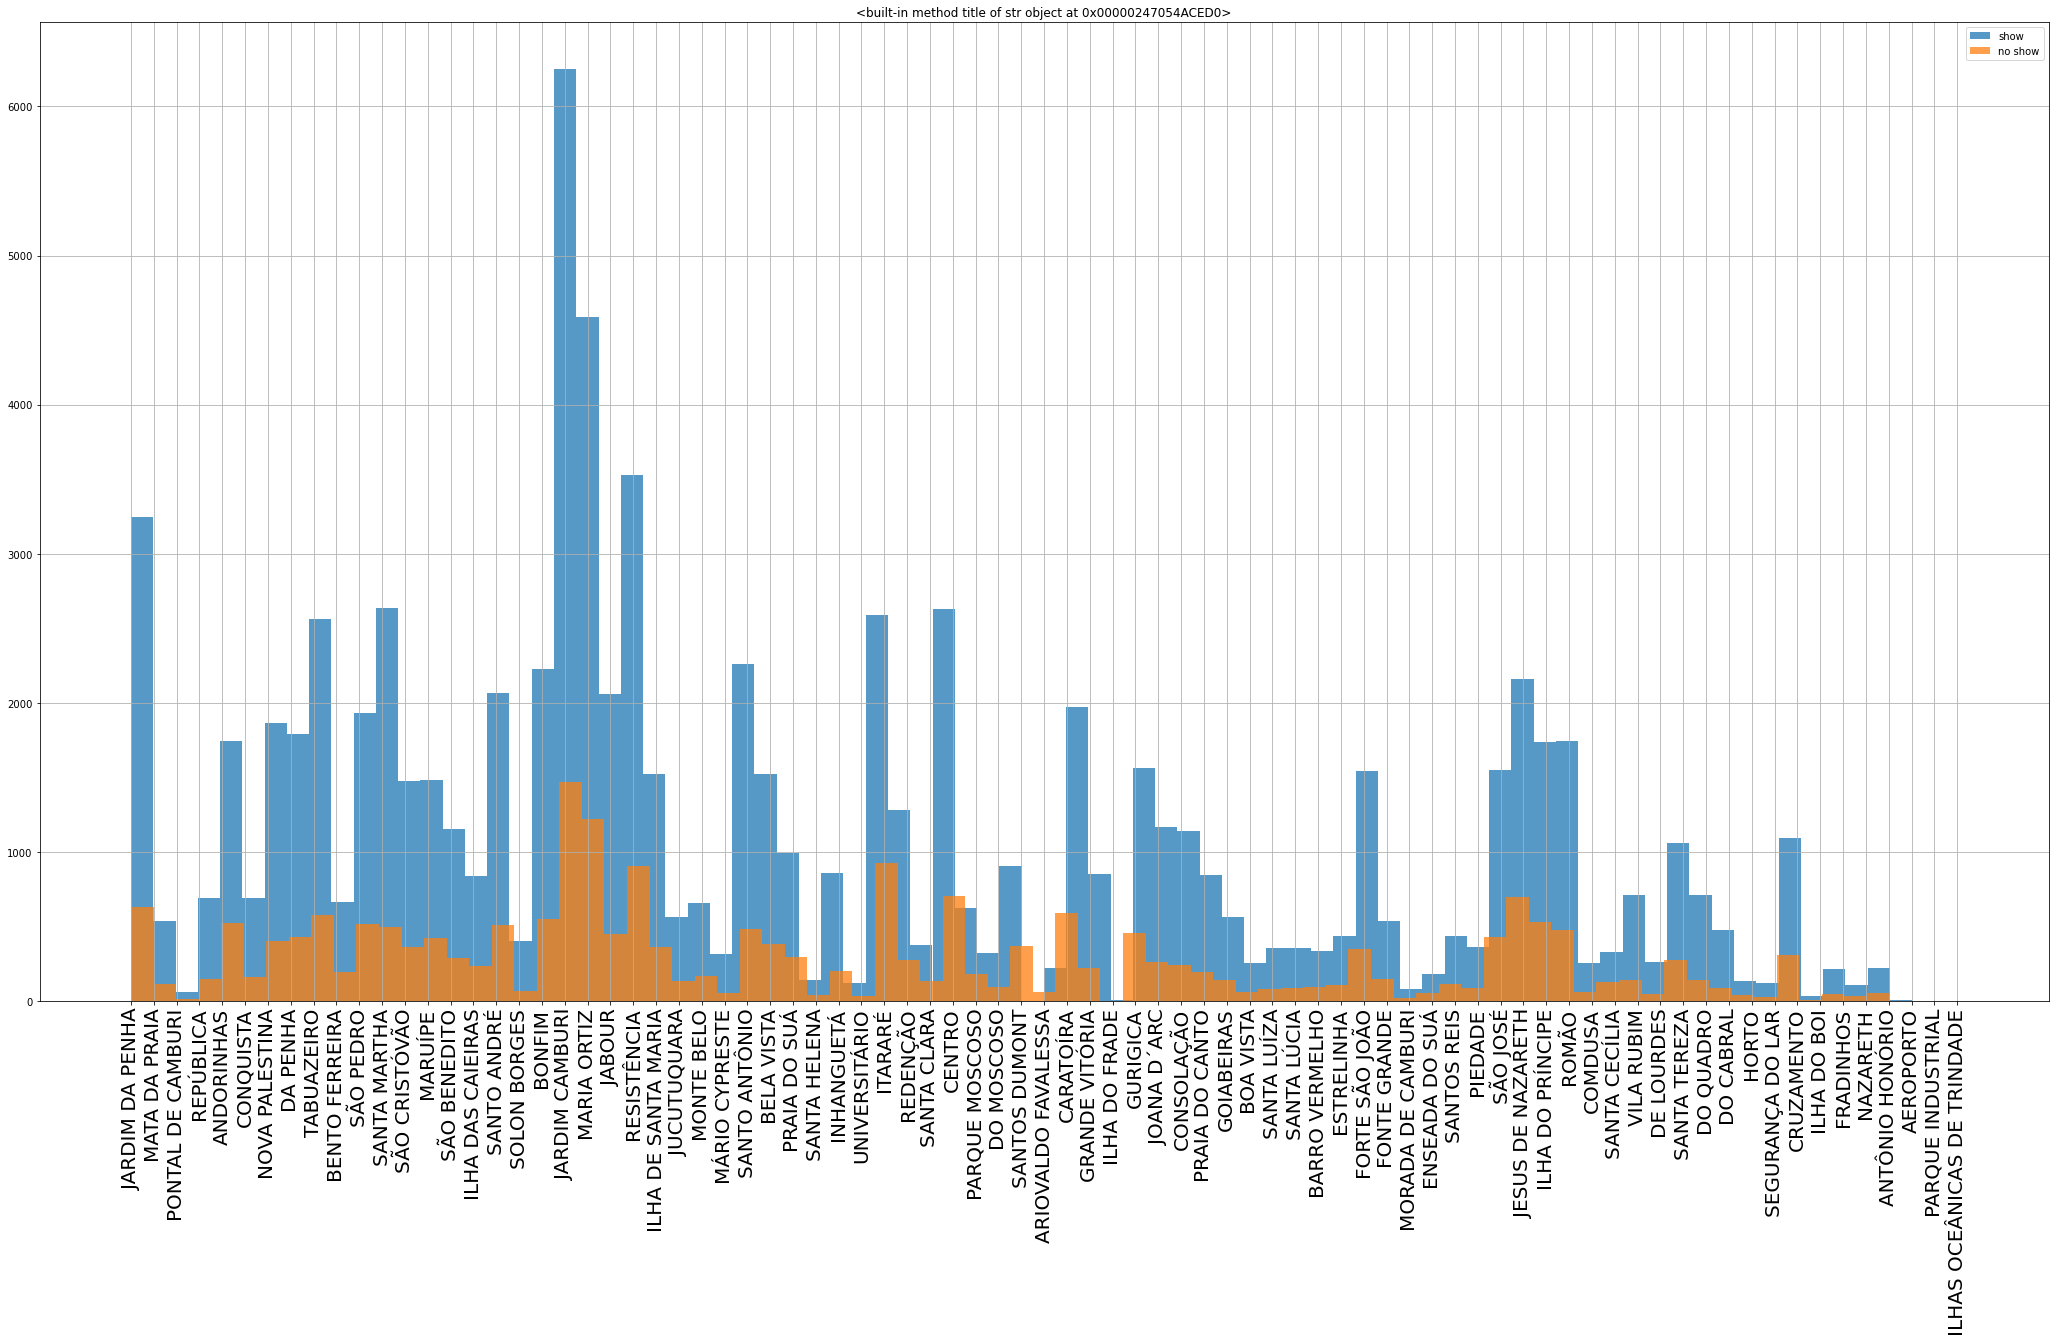

In [60]:
df.Neighbourhood[show].hist(alpha=0.75, figsize=(24,10), bins=81, label='show')
df.Neighbourhood[no_show].hist(alpha=0.75, figsize=(36,18), bins=81, label='no show')
plt.xticks(rotation='vertical')
plt.tick_params(axis='x', which='major', labelsize=20)
plt.title('Neighbourhood counts /show / no show'.title)
plt.legend();

- JARDIM CAMBURI, MARIA ORTIZ, RESISTÊNCIA, JARDIM DA PENHA and ITARARÉ  are the most recommended Neighbourhood .

### Does the Scholarship will affect in attendance ?

In [49]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

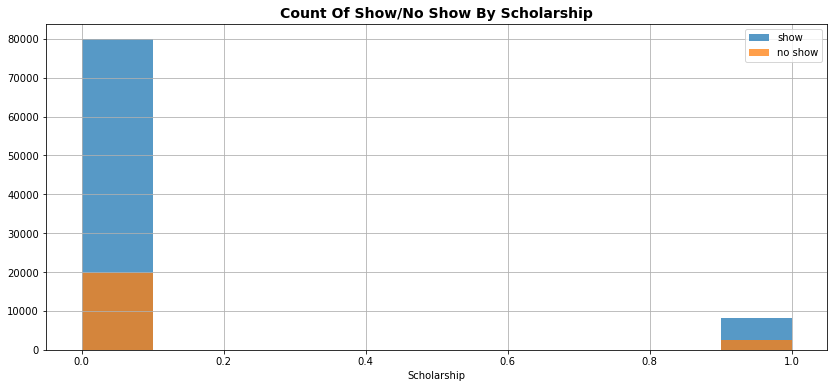

In [50]:
myCountPlot(df, 'Scholarship')

- Scholarship had the samllest affection.

### What is  the affection of other items in attendance ?

In [51]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

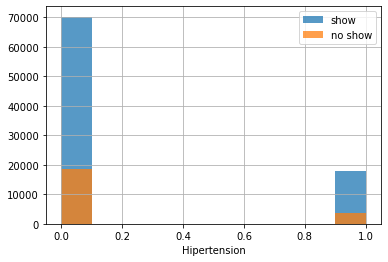

In [52]:
df.Hipertension[show].hist(alpha=0.75, label='show')
df.Hipertension[no_show].hist(alpha=0.75, label='no show')
plt.xlabel('Hipertension')
plt.legend();

In [53]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

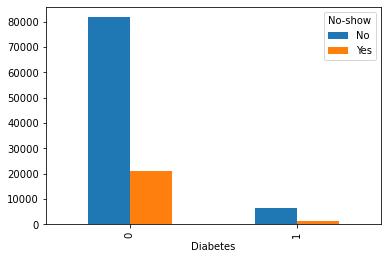

In [54]:
df.groupby('Diabetes')['No-show'].value_counts().unstack().plot(kind='bar');

In [55]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

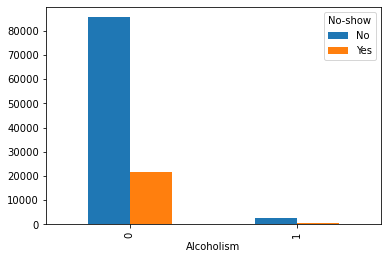

In [56]:
df.groupby('Alcoholism')['No-show'].value_counts().unstack().plot(kind='bar');

In [57]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

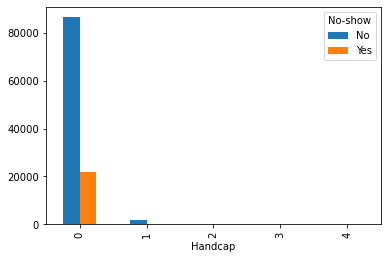

In [58]:
df.groupby('Handcap')['No-show'].value_counts().unstack().plot(kind='bar');

- check parameters shown no affection in attendace.

## Conclusions

> - SMS is not A good indication Parameter as not received people attend as same as received people.
> - People Above 40 years old tend to appear in their appointments than elder People.
> - Females are the most exist Gender compared to males .
> - JARDIM CAMBURI, MARIA ORTIZ, RESISTÊNCIA, JARDIM DA PENHA and ITARARÉ  are the most recommended Neighbourhood .
> - Scholarship is not a good indication Parameter.
> - Patient ID shows that some Peoples come many times.

## Limitations

> - Most Analysis made between attendance and other factor only.
> - All statistics made are only descriptive.

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295